# SCC-ICMC-USP - 1o. semestre de 2024
# SCC5871/MAI5025 - APRENDIZADO DE MÁQUINA
# **Exercício 4**

### Profa. Roseli A. F. Romero


Nro do grupo:

Alunos:


1.   Julyana Flores de Prá  
2.   Thiago Rafael Mariotti Claudio


O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

### **Questão 1**

 - Separe o conjunto em treinamento (80%) e teste (20%)
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos
 - Dica: O Sklearn não trabalha com atributos nominais em árvores de decisão

In [50]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv("breast-cancer-wisconsin.data", sep=",", names=["Feature0","Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7","Feature8","Feature9","Target"], na_values="?")
display(df)
display(df.describe())

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Target
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Target
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [51]:
display(df.dtypes)
display(df.isna().sum())

Feature0      int64
Feature1      int64
Feature2      int64
Feature3      int64
Feature4      int64
Feature5      int64
Feature6    float64
Feature7      int64
Feature8      int64
Feature9      int64
Target        int64
dtype: object

Feature0     0
Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6    16
Feature7     0
Feature8     0
Feature9     0
Target       0
dtype: int64

A coluna nomeada como "Feature6" está descrita como __string__, possivelmente indicando valores desconhecidos.  
Também é notável que a última coluna se refere ao atributo alvo de diagnóstico, pois seu valores são eaxatamente 2 ou 4, o que expressa sua natureza binária.

Dessa forma, vamos realizar algumas operações de pré-processamento.

__OBS:__ as nomeações foram arbitrárias devido à falta de informação dos cabeçalhos.

__1. Remover coluna de indentificadores__

A coluna "Feature0" refere-se à identificação dos pacientes, e portanto não é relevante para o estudo.

In [52]:
df.drop(columns=["Feature0"], inplace=True, axis=1)

__2. Padronizar os valores-alvo__

Vamos utilizar os valores padrão para classes binárias, 0 e 1, em detrimento aos valores atualmente aplicados, 2 e 4.  
(Como o valor __2__ aparece em maioria, é plausível assumir que represente resultados _benígnos_, embora isso não seja relevante.)

In [53]:
df["Target"] = df["Target"].map({2: 1, 4: 0})

### **Questão 2**
Verificar se existem dados nulos.

__Substituir valores desconhecidos em "Feature6"__

Nessa operação vamos interporlar os valores desconhecidos com os vizinhos próximos através do método _interpolation_.

In [54]:
from sklearn.impute import KNNImputer

col_feat6 = df[['Feature6']]
knn_imputer = KNNImputer(n_neighbors=3)

col_feat6_imputed = knn_imputer.fit_transform(col_feat6)
df['Feature6'] = col_feat6_imputed

### **Questão 3**
Verifique se existem outliers e  quais atributos possuem outliers.
Crie um novo conjunto de dados, eliminando os outliers e considere esse novo conjunto para resolver os itens seguintes.

<Axes: xlabel='variable', ylabel='value'>

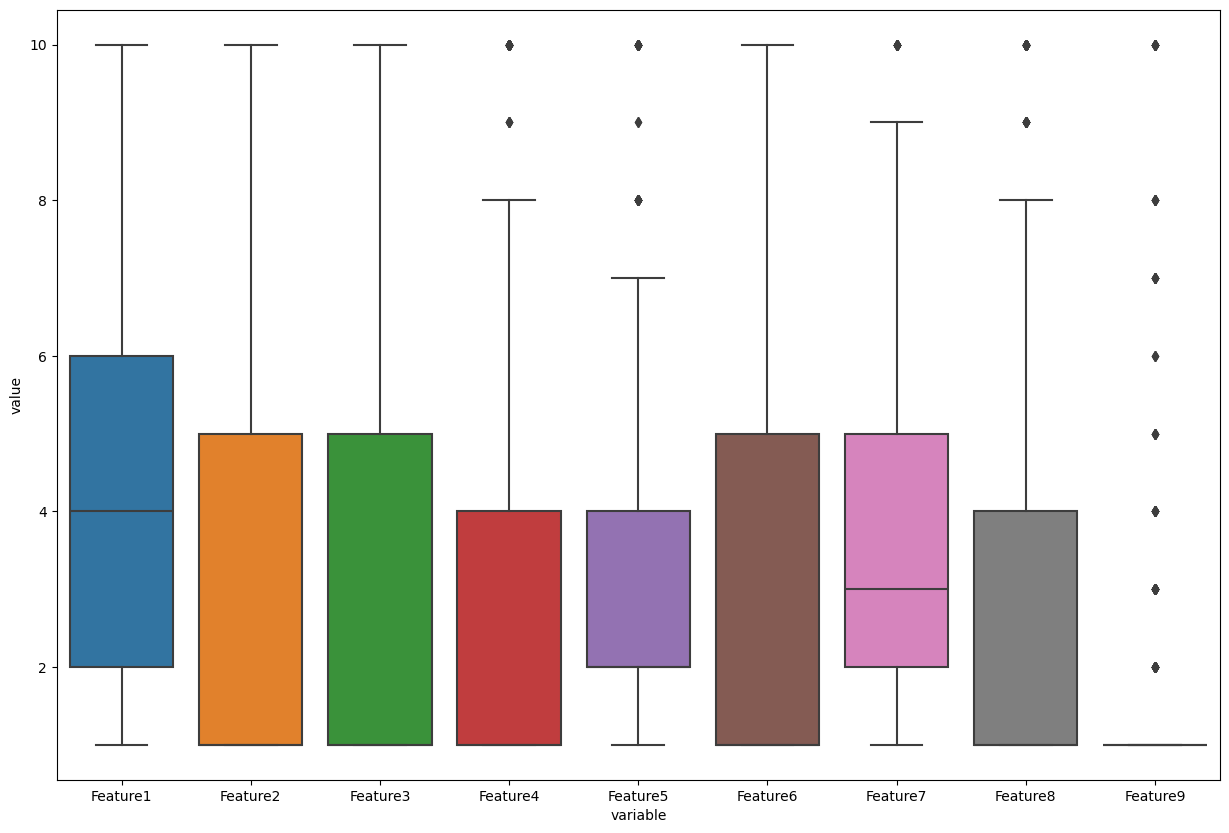

In [55]:
import seaborn as sns

df_no_target = df.iloc[:, 0:9]
sns.boxplot(x="variable", y="value", data=pd.melt(df_no_target))

Apesar do plot feio (preguiça de arrumar), podemos verificar que alguns atributos apresentam _outliers_. Os maiores agressores são: __Feature4, Feature5, Feature7, Feature8, Feature9__, sendo este último o atributo com valores mais discrepantes.

Podemos gerar uma função simples para remover esses valores.

In [56]:
print("O dataframe foi reduzido para", df.shape)

O dataframe foi reduzido para (699, 10)


In [57]:
def remove_outliers(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    Essa função recebe uma column do dataframe, verifica se a coluna é númerica.
    Em caso positivo corta os outliers (extremos minimos e máximos), transformando-os em NaN.
    Tudo foi feito à mão porque eu jamais vou depositar minhas confianças 
    em qualquer built-in do Python/Pandas/libs (eu também não tenho amor proprio).
    """
    if not pd.api.types.is_numeric_dtype(df[col_name]):
        raise ValueError("A coluna não é númerica. Como você espera remover outlier de algo não-númerico? Bobão!")

    lower_bound = df[col_name].mean() - 3 * df[col_name].std()
    upper_bound = df[col_name].mean() + 3 * df[col_name].std()

    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

    return df

In [58]:
"""
Neste snippet, as colunas passam por avaliação de outlier, e, os valores extremos, agora NaN
são removidos através do dropna.

É feio? Talvez!
É sagaz? Talvez!
Por que eu fiz isso? Só Rá pra dizer!
"""
df_capped_outliers = df.copy()

for col_name in df.columns:
    if col_name != "Target":
        df_capped_outliers = remove_outliers(df=df_capped_outliers.copy(), col_name=col_name)

df_capped_outliers.dropna(inplace=True)

In [59]:
print("O dataframe foi reduzido para", df_capped_outliers.shape)

O dataframe foi reduzido para (645, 10)


In [60]:
display(df_capped_outliers.describe())

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Target
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,4.162791,2.753488,2.844961,2.528682,2.815504,3.229015,3.206202,2.587597,1.229457,0.705426
std,2.683023,2.749874,2.673337,2.607538,1.619488,3.434371,2.262843,2.835637,0.687104,0.456205
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,5.000000,1.000000


### **Seção extra - Train/Test split**

Aqui definimos as _samples_ de treino (80%) e teste (20%) que serão utilizadas.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_capped_outliers.drop(columns=["Target"])
y = df_capped_outliers["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Questão 4**
Treine um modelo de regressão com o método DT, no conjunto de treino e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [63]:
print("Acuracia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

Acuracia: 0.9147286821705426
Precisão: 0.9213483146067416
F1: 0.9371428571428573
MSE 0.08527131782945736


### **Questão 5**
Treine um modelo de classificação com o **método RF**, no conjunto de treino  e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste. Determine usando o modelo RF os atributos mais relevantes.

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [65]:
print("Acuracia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

Acuracia: 0.9689922480620154
Precisão: 0.9767441860465116
F1: 0.9767441860465116
MSE 0.031007751937984496


### **Questão 6**

Treine um modelo de classificação com o método XGBoost, no conjunto de treino  e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

- Dica: Utilize `xgboost.XGBRegressor`

In [66]:
import xgboost as xgb

xgr = xgb.XGBClassifier()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)

xgb_importances = xgr.feature_importances_


In [67]:
print("Acuracia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

Acuracia: 0.9612403100775194
Precisão: 0.9764705882352941
F1: 0.9707602339181286
MSE 0.03875968992248062


### **Questão 7**

Compare seus resultados com os modelos dos exercícios anteriores.

- Dica: Cuidado para usar o mesmo train/test split em todos os modelos para que a comparação faça sentido. Para isso você pode utilizar o mesmo `random_state` na função `train_test_split` nos dois métodos.




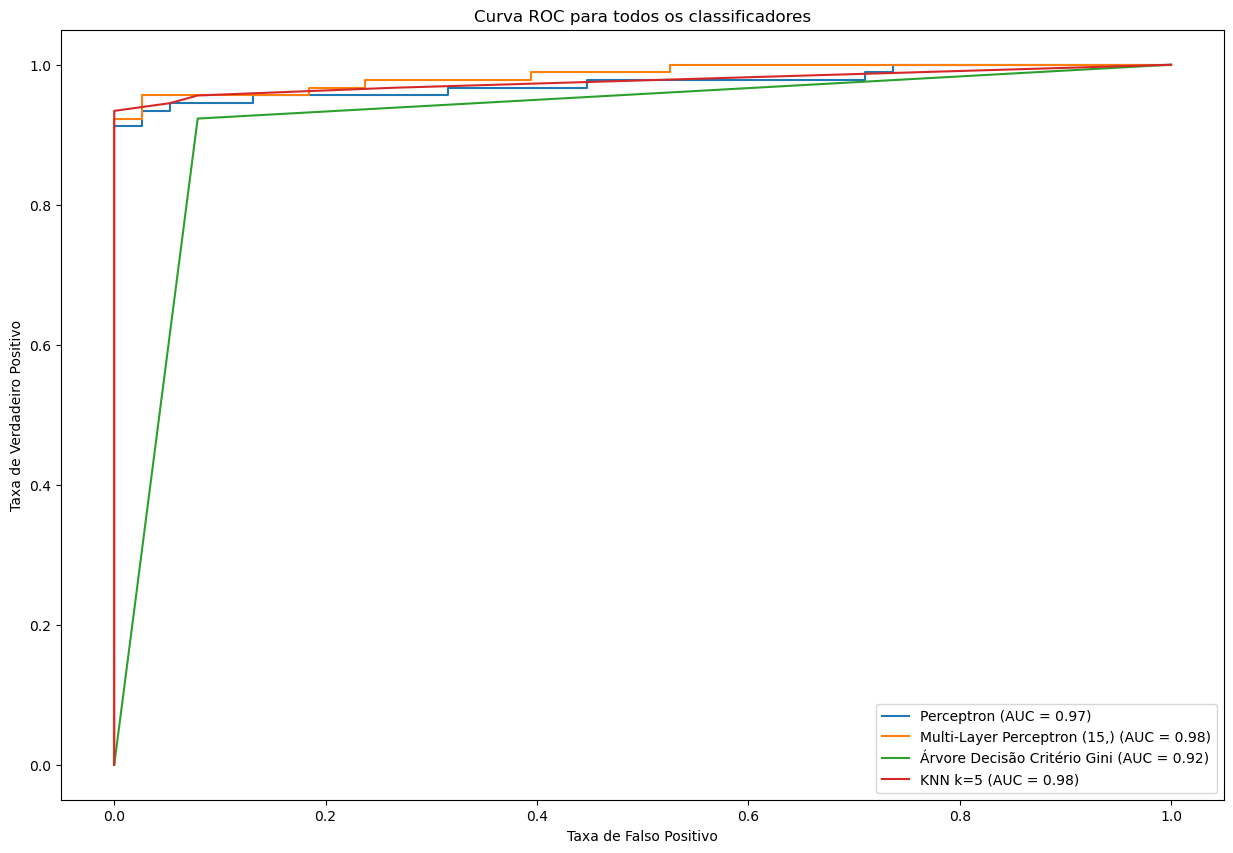

In [68]:
# modelos exerício 3:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, accuracy_score, precision_score, f1_score, mean_squared_error, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

classificadores = {
    "Perceptron": {"modelo": Perceptron(), "scores": []},
    "Multi-Layer Perceptron (15,)": {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
    "Árvore Decisão Critério Gini": {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
    "KNN k=5": {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

for classificador_name, classificador_info in classificadores.items():
    clf = classificador_info["modelo"]
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    # Para roc_auc_score e RocCurveDisplay, precisamos das probabilidades ou da função de decisão
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = clf.decision_function(X_test)
    
    # Cálculos das métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Salvando as métricas
    classificador_info["scores"].append({
        "accuracy": acc,
        "precision": prec,
        "f1_score": f1,
        "mean_squared_error": mse,
        "roc_auc": roc_auc
    })
    
    # Plotando a curva ROC
    RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax, name=classificador_name)

plt.title('Curva ROC para todos os classificadores')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc='lower right')
plt.show()


In [69]:
# Exibindo as métricas
for classificador_name, classificador_info in classificadores.items():
    print(f"Classificador: {classificador_name}")
    for score in classificador_info["scores"]:
        print(f"  Accuracy: {score['accuracy']}")
        print(f"  Precision: {score['precision']}")
        print(f"  F1 Score: {score['f1_score']}")
        print(f"  Mean Squared Error: {score['mean_squared_error']}")
        print(f"  ROC AUC: {score['roc_auc']}")
    print()

Classificador: Perceptron
  Accuracy: 0.9457364341085271
  Precision: 0.9883720930232558
  F1 Score: 0.96045197740113
  Mean Squared Error: 0.05426356589147287
  ROC AUC: 0.973105841526894

Classificador: Multi-Layer Perceptron (15,)
  Accuracy: 0.9534883720930233
  Precision: 0.9885057471264368
  F1 Score: 0.9662921348314606
  Mean Squared Error: 0.046511627906976744
  ROC AUC: 0.984384037015616

Classificador: Árvore Decisão Critério Gini
  Accuracy: 0.9224806201550387
  Precision: 0.9655172413793104
  F1 Score: 0.9438202247191013
  Mean Squared Error: 0.07751937984496124
  ROC AUC: 0.9220647773279352

Classificador: KNN k=5
  Accuracy: 0.9457364341085271
  Precision: 0.9772727272727273
  F1 Score: 0.9608938547486033
  Mean Squared Error: 0.05426356589147287
  ROC AUC: 0.9762868710237131



In [70]:
# modelos exercício 2:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, make_scorer, precision_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 10), learning_rate_init=1e-2, solver='sgd', max_iter=800, random_state=42)
mlp.fit(X_train, y_train)

y_pred_proba = mlp.predict_proba(X_test)
binary_cross_entropy_loss = log_loss(y_test, y_pred_proba)

print("Binary Cross-Entropy Loss:", binary_cross_entropy_loss)

experiments = {
    "MLP camada escondida (10,)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=800, random_state=42),
    "MLP camadas escondidas (10, 10) ReLU": MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=800, random_state=42),
    "MLP camadas escondidas (20, 10) Tanh": MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', max_iter=800, random_state=42)
}

def evaluate_model(model, X, y):
    """
    Evaluates the model using 10-fold stratified cross-validation and returns the mean accuracy, precision, F1-score, and mean squared error.
    
    Parameters:
        model: Classifier model to evaluate.
        X: Input features.
        y: Target labels.
        
    Returns:
        scores: A dictionary with mean accuracy, precision, F1-score, and mean squared error.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'f1_score': make_scorer(f1_score),
        'mse': make_scorer(mean_squared_error)
    }
    
    scores = cross_validate(model, X_scaled, y, cv=skf, scoring=scoring)
    
    mean_scores = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision': np.mean(scores['test_precision']),
        'f1_score': np.mean(scores['test_f1_score']),
        'mean_squared_error': np.mean(scores['test_mse'])
    }
    
    return mean_scores

results = {}
for name, model in experiments.items():
    scores = evaluate_model(model, X, y)
    results[name] = scores

# Exibindo os resultados
for name, scores in results.items():
    print(f"Classificador: {name}")
    print(f"  Accuracy: {scores['accuracy']}")
    print(f"  Precision: {scores['precision']}")
    print(f"  F1 Score: {scores['f1_score']}")
    print(f"  Mean Squared Error: {scores['mean_squared_error']}")
    print()

Binary Cross-Entropy Loss: 0.2511088679172289
Classificador: MLP camada escondida (10,)
  Accuracy: 0.9643028846153847
  Precision: 0.9843807511250446
  F1 Score: 0.9743029796509319
  Mean Squared Error: 0.03569711538461538

Classificador: MLP camadas escondidas (10, 10) ReLU
  Accuracy: 0.9642548076923078
  Precision: 0.9822956307258632
  F1 Score: 0.9743999950430743
  Mean Squared Error: 0.03574519230769231

Classificador: MLP camadas escondidas (20, 10) Tanh
  Accuracy: 0.9658894230769232
  Precision: 0.9824472990777338
  F1 Score: 0.9755993574783917
  Mean Squared Error: 0.034110576923076924



### **Questão 8**

Verifique a importância de cada feature para o resultado final utilizando o melhor modelo. O que isso diz sobre o problema que estamos tentando resolver?

R: Analisando todos os valores obtidos para as métricas de acurácia, precisão, F1-score, Mean Squared Error (MSE) e ROC AUC, devemos ter em mente que: 
1. Acurácia: A taxa de acertos do modelo.
2. Precisão: A proporção de verdadeiros positivos sobre todos os resultados positivos preditos.
3. F1-score: A média harmônica entre precisão e recall, equilibrando os dois.
4. Mean Squared Error (MSE): A média dos quadrados dos erros (quanto menor, melhor).
5. ROC AUC: A área sob a curva ROC, uma medida de quão bem o modelo distingue entre classes positivas e negativas (quanto mais ao canto superior esquerdo, melhor).

Dessa forma, podemos considerar que os valores obtidos para as métricas utilizando **Random Forest** foram as melhores (embora MLP com camadas escondidas (20, 10) Tanh e MLP com camada escondida (10,) ou (10, 10) ReLU também tenham apresentado desempenhos muito bons):
- Alta acurácia: 0.9690
- Alta precisão: 0.9767
- Excelente F1 Score: 0.9767}
- Baixo MSE: 0.0310

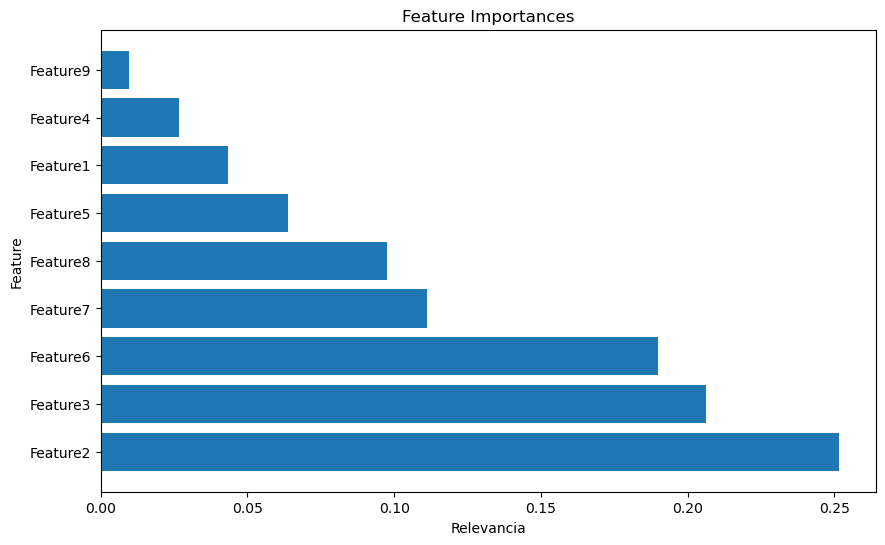

Features mais relevantes:
    Feature  Relevancia
1  Feature2    0.251578
2  Feature3    0.206208
5  Feature6    0.190025
6  Feature7    0.111065
7  Feature8    0.097646


In [71]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Relevancia': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Relevancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Relevancia'])
plt.xlabel('Relevancia')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

print("Features mais relevantes:")
print(feature_importance_df.head())